In [1]:
# Importing the required packages
import keras

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D 
from keras.optimizers import SGD
from keras.utils import print_summary, to_categorical

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Defining model parameters
batch_size = 64
num_classes = 10
epochs = 10

In [3]:
# Loading the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# Converting the labels into Categorical Matrix
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
# Casting it to type:"float32"
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data
X_train = X_train/255
X_test = X_test/255

In [6]:
# Shape of X_train
X_train.shape[:]

(50000, 32, 32, 3)

In [7]:
# Building our CNN model
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [8]:
# Using Stochastic Gradient Descent(with momentum) optimizer, to optimize the weights
optimizer = SGD(lr=0.01, momentum=0.9, decay=0, nesterov=False)

In [9]:
# Configuring the model for training
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Training our model
train_CNN = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 71s 2ms/step - loss: 1.8833 - acc: 0.3097 - val_loss: 1.5520 - val_acc: 0.4387 - E

In [11]:
# Prints the relevant information of about our model 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [12]:
print(train_CNN.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


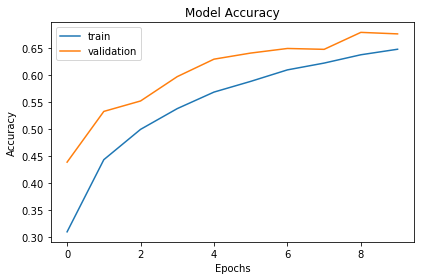

In [13]:
# Plot that shows Accuracy vs Epochs, for our model
plt.plot(train_CNN.history['acc'])
plt.plot(train_CNN.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.show()

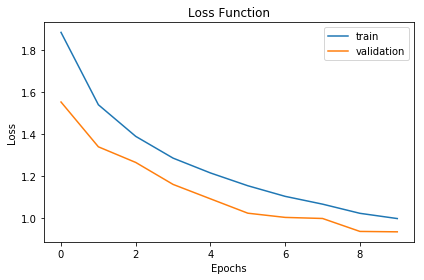

In [14]:
# Plot that shows Loss vs Epochs, for our model
plt.plot(train_CNN.history['loss'])
plt.plot(train_CNN.history['val_loss'])
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [15]:
# Evaluating our model on test data
test_CNN = model.evaluate(X_test, y_test, batch_size=batch_size)

10000/10000 [==============================] - 5s 528us/step

In [16]:
# Print the Loss and Accuracy of our model on Test Data
print("Accuracy on test data:",  test_CNN[1])
print("Value of our Loss Function on test data:", test_CNN[0])

Accuracy on test data: 0.6734
Value of our Loss Function on test data: 0.939673342323
